In [1]:
import pandas as pd
import numpy as np
from ast import literal_eval
import re

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import stylecloud
from IPython.display import Image, display

import warnings
warnings.filterwarnings('ignore')

def count_categories(data, x):
    
    df = data.groupby(x)['URL'].count().reset_index()
    
    fig = px.bar(df, y = x, x = 'URL', title = 'Categories of ' + str(x), width = 750, height = 500,
                 labels = {'URL' : '# of listings'})
    fig.update_layout(showlegend=False, yaxis = {'tickfont' : {'size' : 9}})
    fig.update_yaxes(visible = True, showticklabels = True, title = None, categoryorder = 'total ascending')
    fig.show()
    
def distribution_numerics(data, x):
    
    fig = px.histogram(data,nbins = 50, x = x, title = 'Distribution of ' + str(x), width = 750, height = 450)
    fig.update_layout(showlegend=False)
    fig.update_traces(marker_line_width = 1/3,marker_line_color = 'white')
    fig.update_yaxes(visible = True, showticklabels = True, title = None)
    fig.show()
    
def plot_corr(df, numerics):
    
    fig, ax = plt.subplots(figsize = (14, 6))
    sns.heatmap(df[numerics].corr(), ax = ax, cmap = 'coolwarm', center = 0, 
                annot = True, fmt = '.2g', annot_kws={'size' : 8})
    plt.title('Correlations\n')
    plt.show()
    
    
def distribution_numerics_sns(data, i):
    
    if i not in ['Évjárat', 'Szállítható szem. száma', 'Ajtók száma', 'Műszaki vizsga érvényes', 'Szín - metál']:
        
        plt.figure(figsize = (9, 4))
        sns.distplot(data[i], kde = False, bins = 40, 
                     hist_kws = {'edgecolor' : 'black', 'linewidth' : 1})

        plt.title('Distribution of ' + i)
        plt.xlabel(None)
        plt.ylabel(None)
        plt.show()  
        
    else:
        
        plt.figure(figsize = (9, 4))
        sns.countplot(data[i], color = '#89bedc', edgecolor = 'black', linewidth = 1/2)

        plt.title('Distribution of ' + i)
        plt.xlabel(None)
        plt.xticks(rotation=90)
        plt.ylabel(None)
        plt.show()
        
def scatter_sns(data, x, y):
    plt.figure(figsize = (9, 5))
    sns.scatterplot(data = data, x = x, y = y, size = 3/4, edgecolor = 'k', linewidth = 1/3, color = 'blue', legend = False)
    plt.title('Relationship between ' + x + ' and ' + y)
    plt.show()  
    
    

BOXPLOT_PROPS = {
    'boxprops':{'edgecolor':'black', 'linewidth' : 1},
    'flierprops':{'markerfacecolor':'black', 'markeredgecolor':'darkgray', 'marker' : 'x'},
    'medianprops':{'color':'black', 'linewidth' : 1},
    'whiskerprops':{'color':'black', 'linewidth' : 1},
    'capprops':{'color':'black', 'linewidth' : 1}
}

def boxplot_sns_price(data, y, xlim = 30000000):   

    order = data.loc[:,['Vételár', y]].groupby([y]).median().sort_values('Vételár', ascending = False)

    plt.figure(figsize = (10, 5))
    sns.boxplot(data = data, y = y, x = 'Vételár', color = 'blue', fliersize = 2, 
                **BOXPLOT_PROPS, order = order.index)
    plt.xlabel('Vételár HUF (10m HUF)')
    plt.ylabel(None)
    plt.xlim(0, xlim)
    #plt.ticklabel_format(style='plain', axis='x',useOffset=False)
    plt.title('Distribution of asking price with regards to ' + y)
    plt.show()
    
    
def boxplot_sns_price_cat(data, y):
    
    order = data.loc[:,['Vételár', y]].groupby([y]).median().sort_index()

    plt.figure(figsize = (10, 5))
    sns.boxplot(data = data, x = y, y = 'Vételár', color = 'blue', fliersize = 2, 
                **BOXPLOT_PROPS, order = order.index)
    plt.ylabel('Vételár HUF (10m HUF)')
    plt.xlabel(None)
    plt.ylim(0, 20000000)
    plt.xticks(rotation = 90, ha = 'center')
    plt.title('Distribution of asking price with regards to ' + y)
    plt.show()

In [2]:
%%time

data = pd.read_csv('data/autok_final_cleaned.csv.gz', compression = 'gzip')

Wall time: 2.31 s


### Value counts of categorical features

In [3]:
categoricals = ['Állapot', 'Kivitel', 'Szállítható szem. száma', 'Ajtók száma', 'Üzemanyag', 'Hajtás', 'Sebességváltó fajtája', 'Okmányok jellege', 'Kategória', 'Márka', 'Szín', 'Klíma fajtája', 'Műszaki vizsga érvényes', 'Modellcsoport modellezéshez']

In [4]:
for i in categoricals:
    count_categories(data, i)

There are only 2 EVs

In [5]:
data = data[data['Üzemanyag'] != 'Elektromos']

### Distributions of numeric features

In [6]:
numeric_columns = data.select_dtypes(exclude = 'O').columns.tolist()

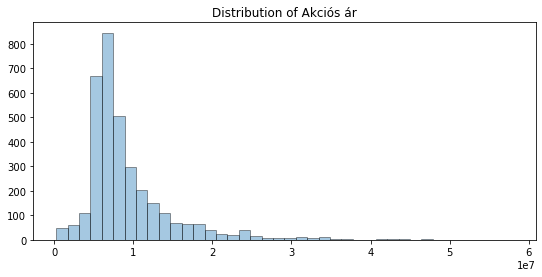

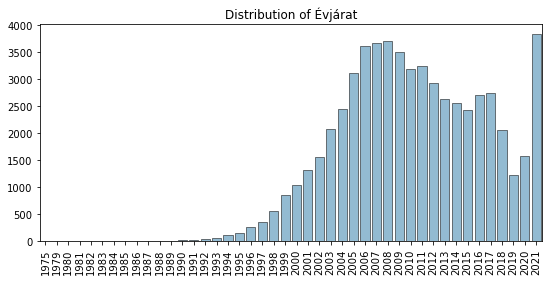

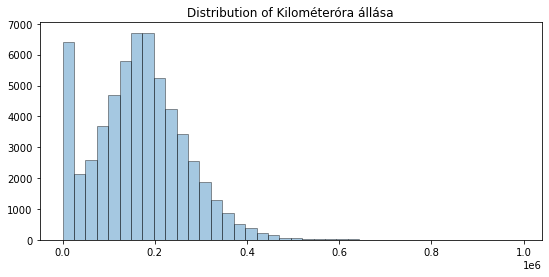

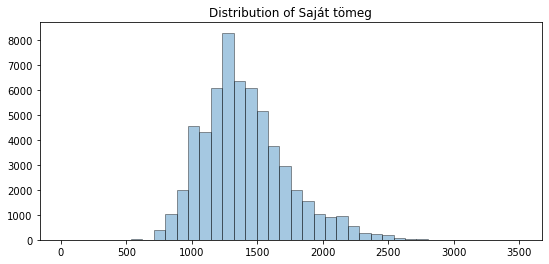

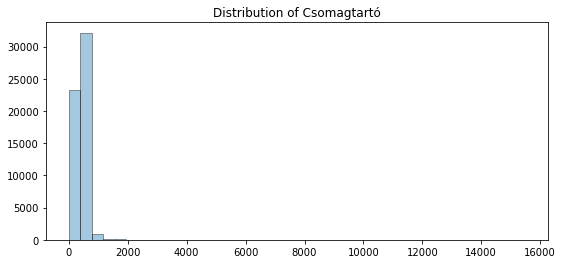

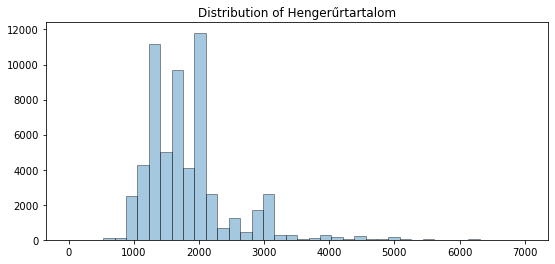

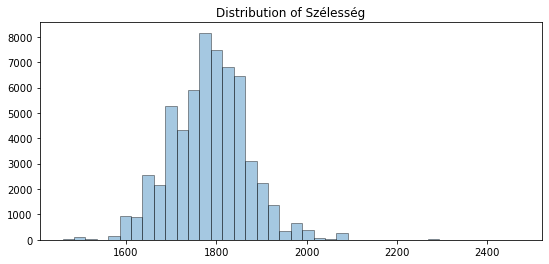

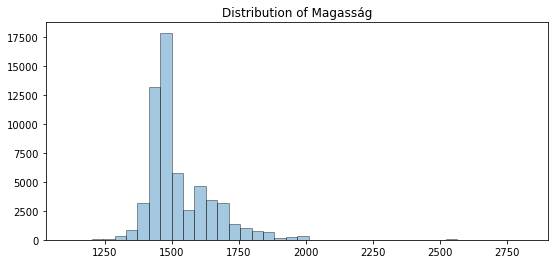

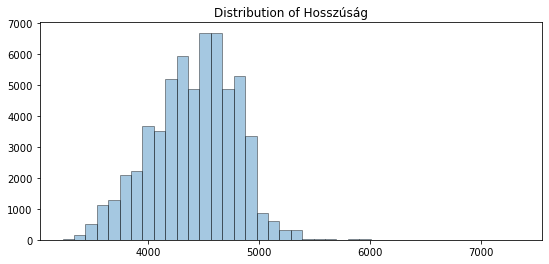

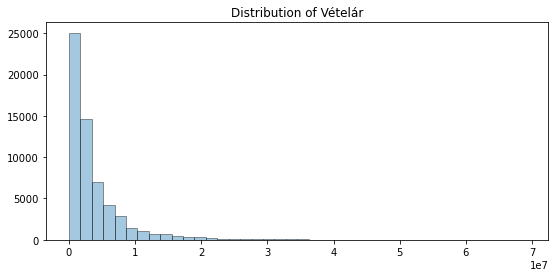

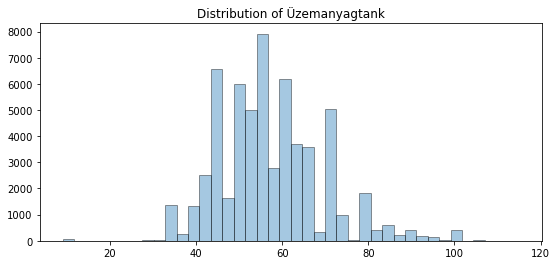

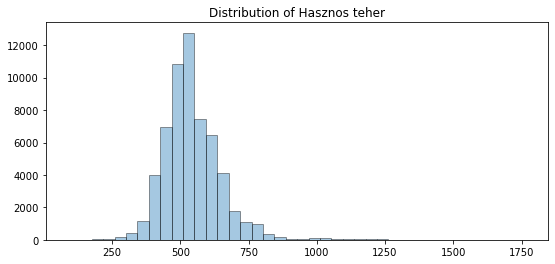

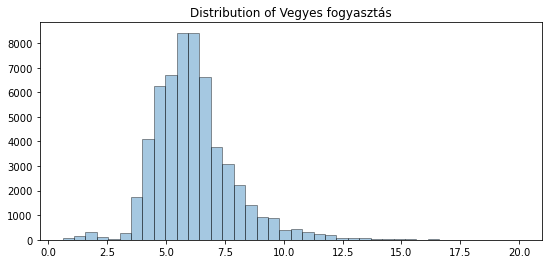

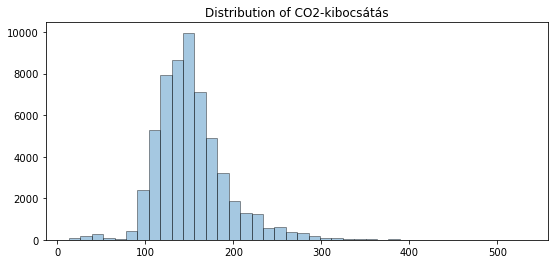

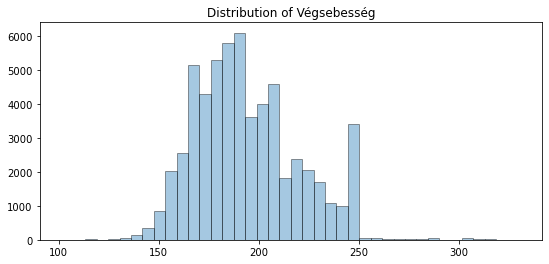

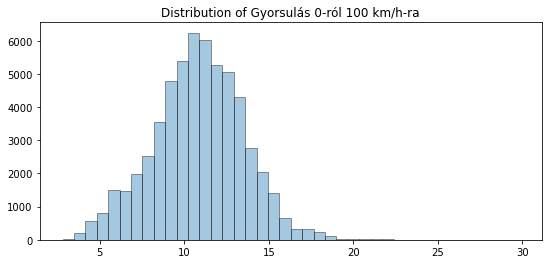

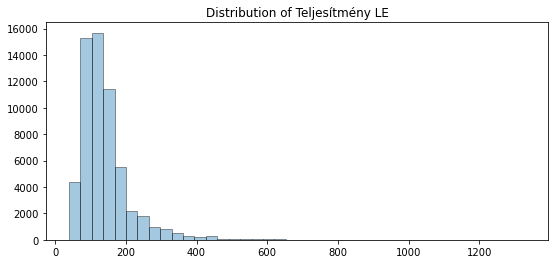

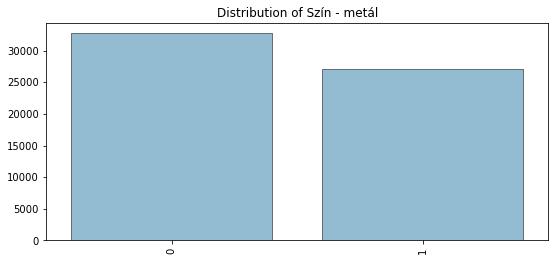

In [7]:
for i in numeric_columns:
    distribution_numerics_sns(data, i)

### Correlation among numeric features

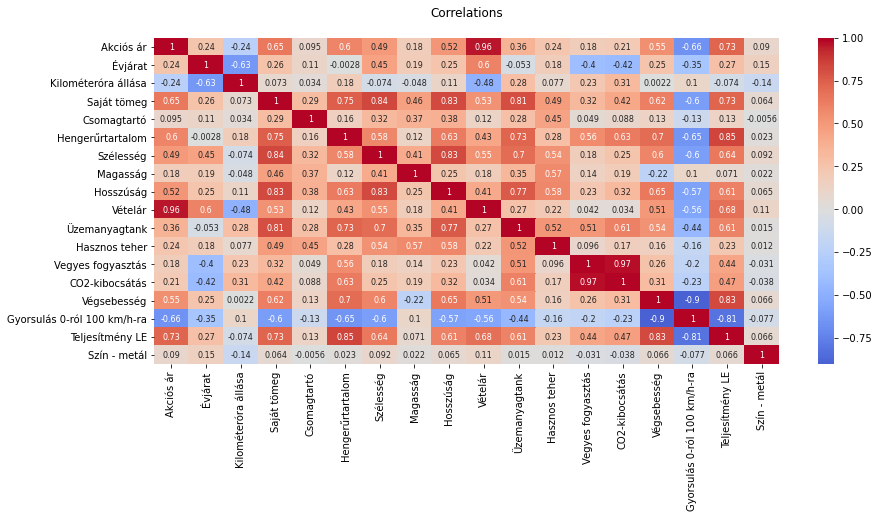

In [8]:
plot_corr(data, numeric_columns)

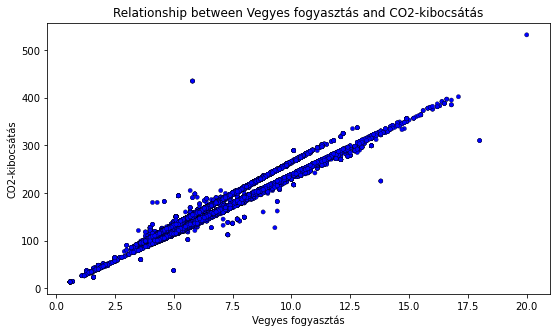

In [9]:
scatter_sns(data, 'Vegyes fogyasztás', 'CO2-kibocsátás')

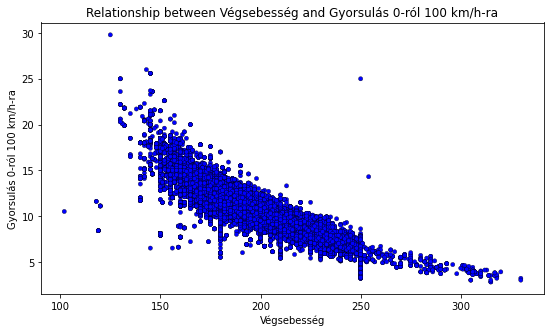

In [10]:
scatter_sns(data, 'Végsebesség', 'Gyorsulás 0-ról 100 km/h-ra')

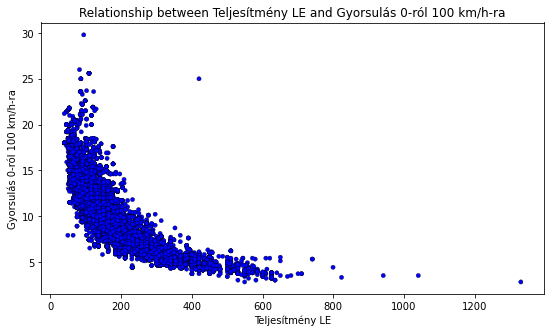

In [11]:
scatter_sns(data, 'Teljesítmény LE', 'Gyorsulás 0-ról 100 km/h-ra')

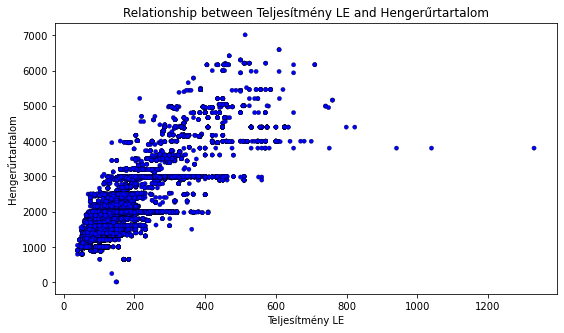

In [12]:
scatter_sns(data, 'Teljesítmény LE', 'Hengerűrtartalom')

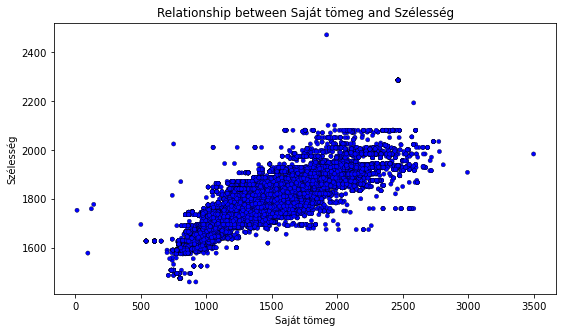

In [13]:
scatter_sns(data, 'Saját tömeg', 'Szélesség')

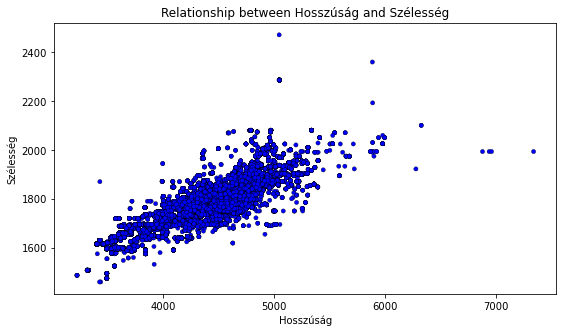

In [14]:
scatter_sns(data, 'Hosszúság', 'Szélesség')

Remove before modeling
- Gyorsulás 0-ról 100 km/h-ra
- CO2-kibocsátás
- Hengerűrtartalom

### Relationships with Price (Vételár)

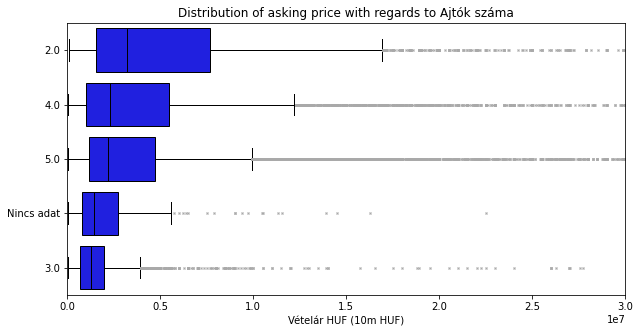

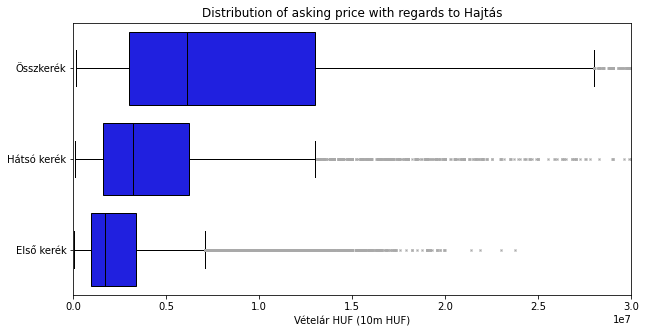

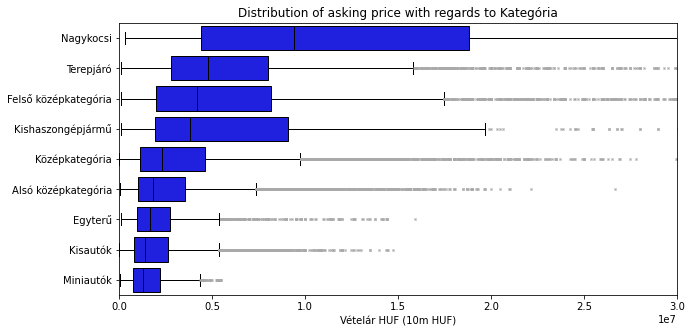

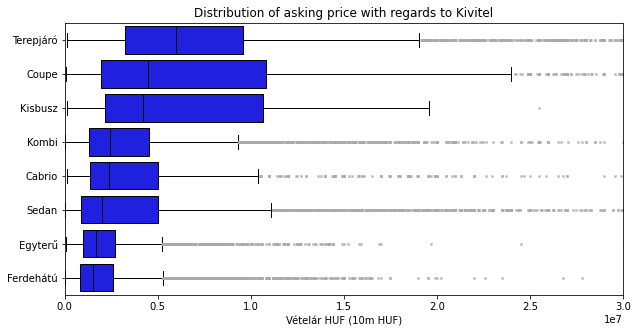

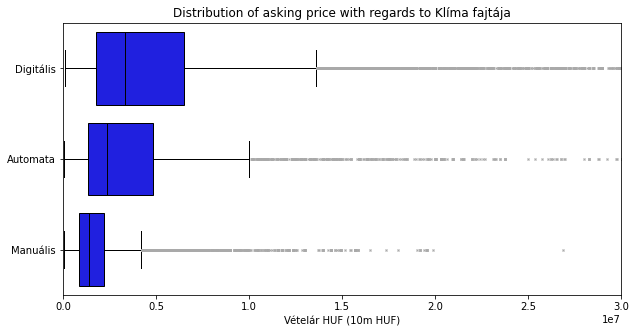

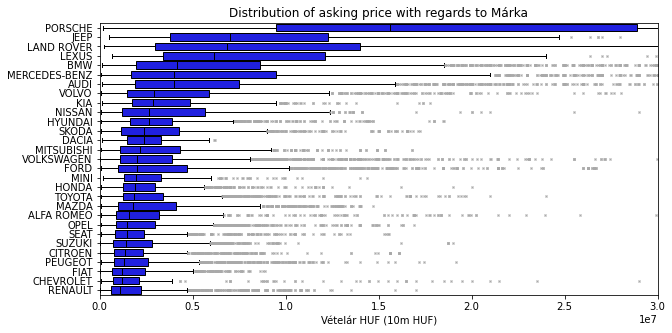

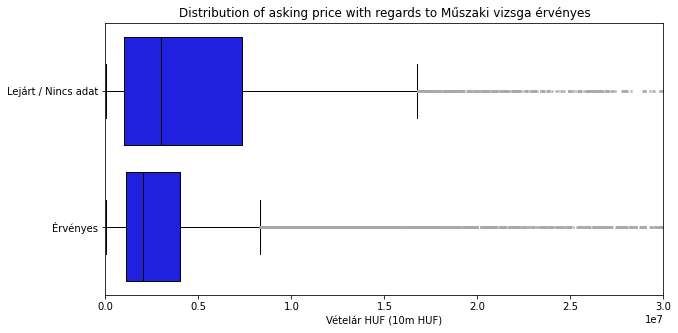

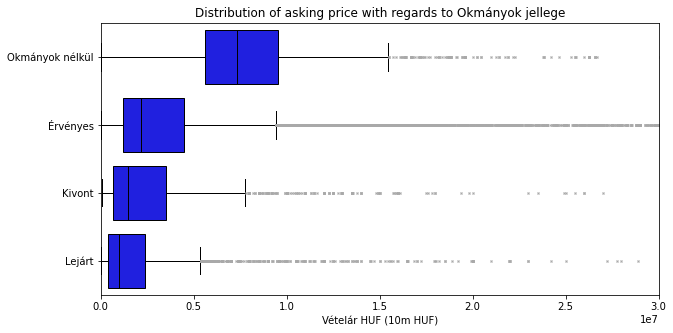

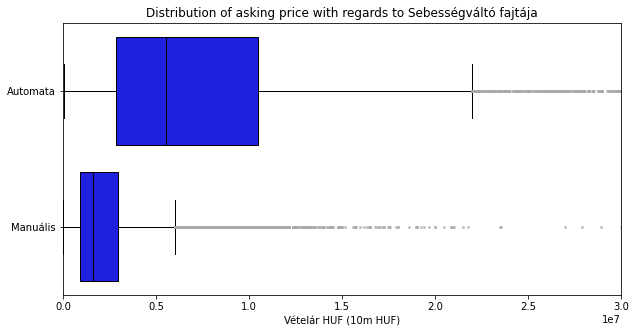

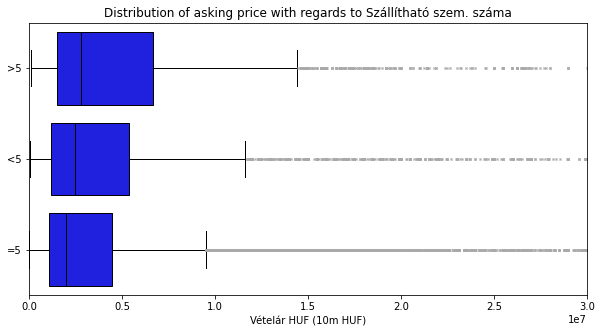

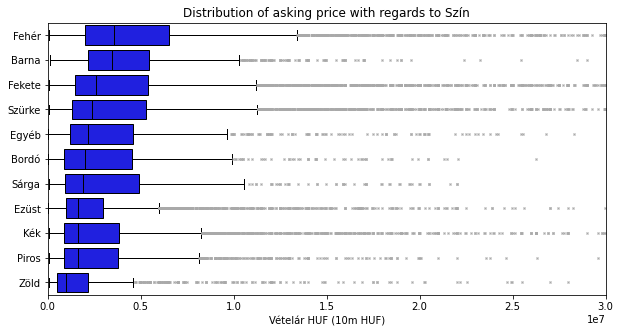

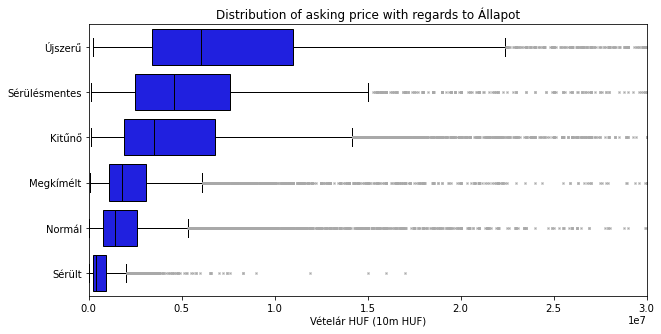

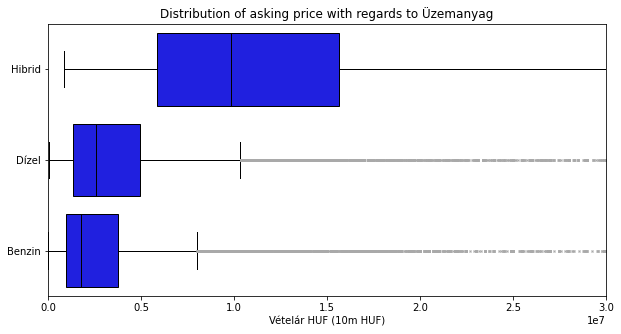

In [15]:
for i in np.setdiff1d(categoricals, 'Modellcsoport modellezéshez'):
    boxplot_sns_price(data, i)

For modeling drop  'Szállítható szem. száma' - has no realy effect on price separation

In [16]:
numerics_as_categories = ['Évjárat', 'Szín - metál']

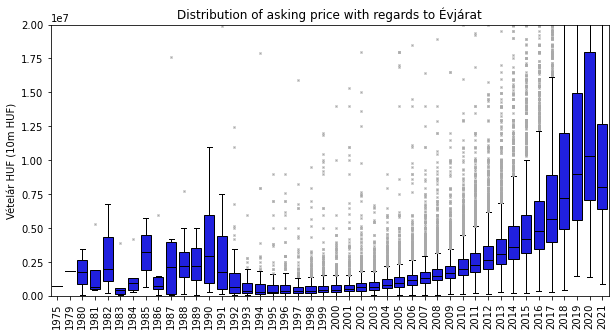

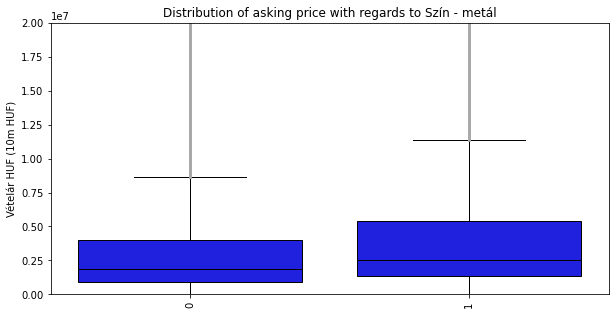

In [17]:
for i in numerics_as_categories:
    boxplot_sns_price_cat(data, i)

In [18]:
numerics_relationship_with_price = ['CO2-kibocsátás', 'Csomagtartó','Gyorsulás 0-ról 100 km/h-ra', 'Hasznos teher', 'Hengerűrtartalom', 'Hosszúság', 'Kilométeróra állása', 'Magasság', 'Saját tömeg', 'Szélesség', 'Teljesítmény LE', 'Vegyes fogyasztás', 'Végsebesség', 'Üzemanyagtank']

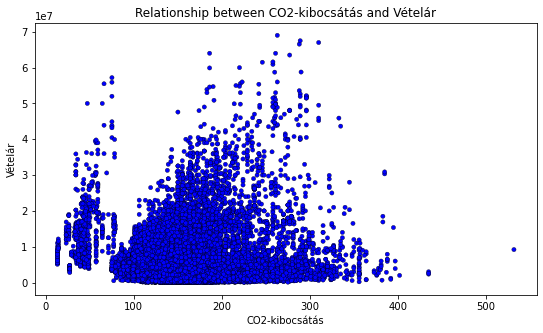

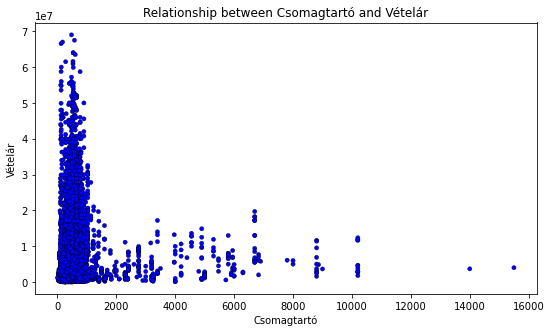

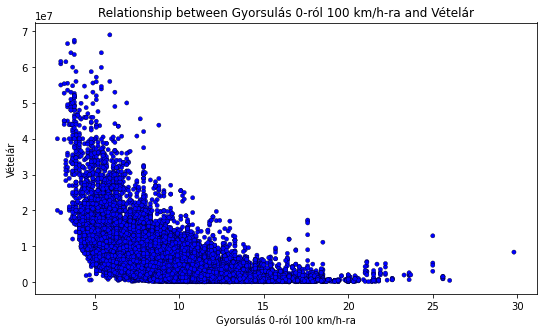

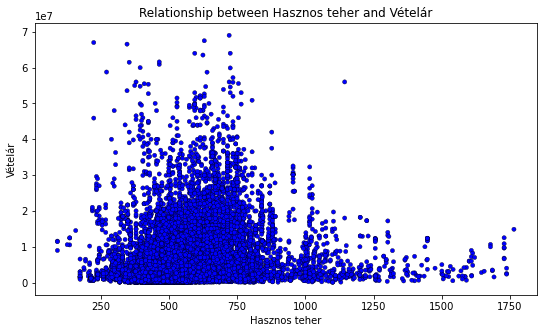

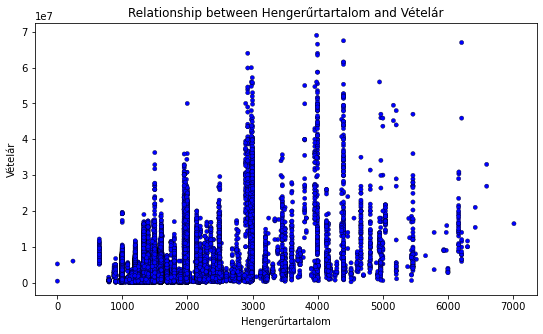

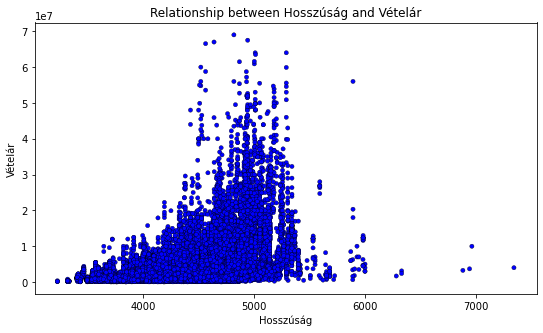

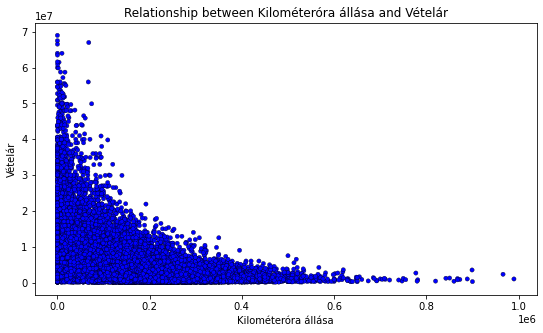

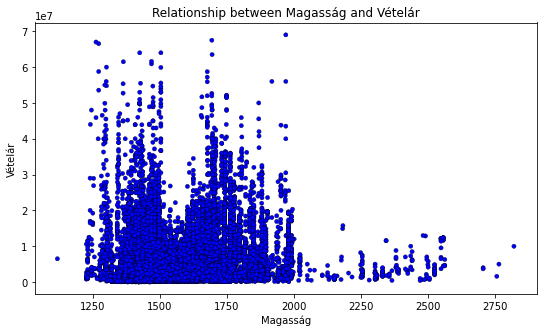

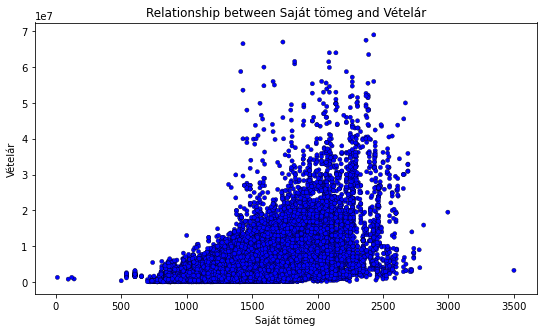

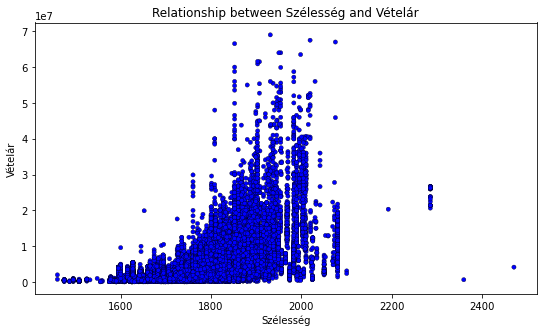

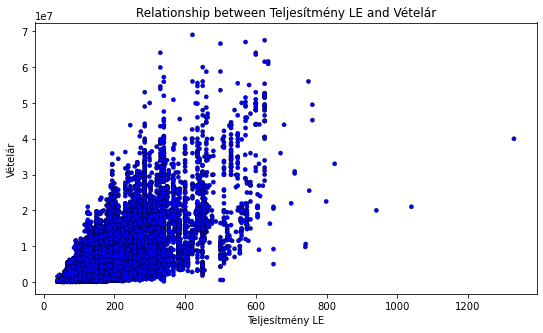

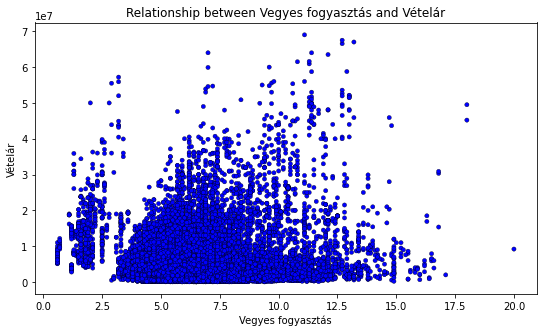

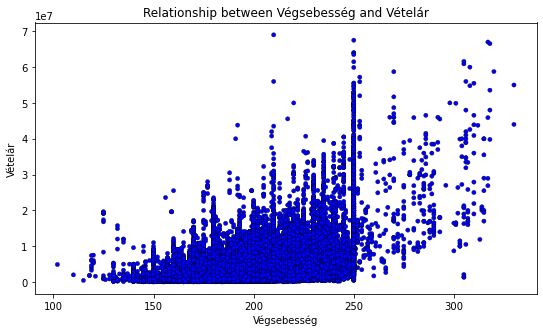

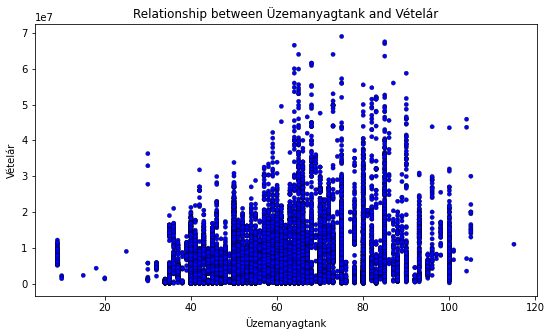

In [19]:
for i in numerics_relationship_with_price:
    scatter_sns(data, i, 'Vételár')

### Felszereltség mutatók

In [20]:
felszereltseg = ['Beltér', 'Műszaki', 'Kültér', 'Multimédia / Navigáció']
data[felszereltseg].isnull().sum() / data.shape[0]

Beltér                    0.073234
Műszaki                   0.069955
Kültér                    0.060253
Multimédia / Navigáció    0.132233
dtype: float64

In [21]:
data[felszereltseg].describe()

Beltér  \
count                                            55403   
unique                                           34975   
top     ['utasoldali légzsák', 'vezetőoldali légzsák']   
freq                                               730   

                                                  Műszaki  \
count                                               55599   
unique                                              23013   
top     ['ABS (blokkolásgátló)', 'indításgátló (immobi...   
freq                                                 2298   

                           Kültér Multimédia / Navigáció  
count                       56179                  51876  
unique                      23969                  20346  
top     ['elektromos ablak elöl']     ['CD-s autórádió']  
freq                          801                   5336

In [22]:
%%time

for i in felszereltseg:
    data[i] = data[i].apply(lambda x: literal_eval(x) if isinstance(x, float) == False else [])

Wall time: 9.07 s


In [23]:
for i in felszereltseg:
    list_of_features = [lista_element for sor in data[i] for lista_element in sor]
    print(i, 'has', len(set(list_of_features)), 'number of unique features')

Beltér has 56 number of unique features
Műszaki has 60 number of unique features
Kültér has 40 number of unique features
Multimédia / Navigáció has 53 number of unique features



Felszereltségek Beltér kategóriában


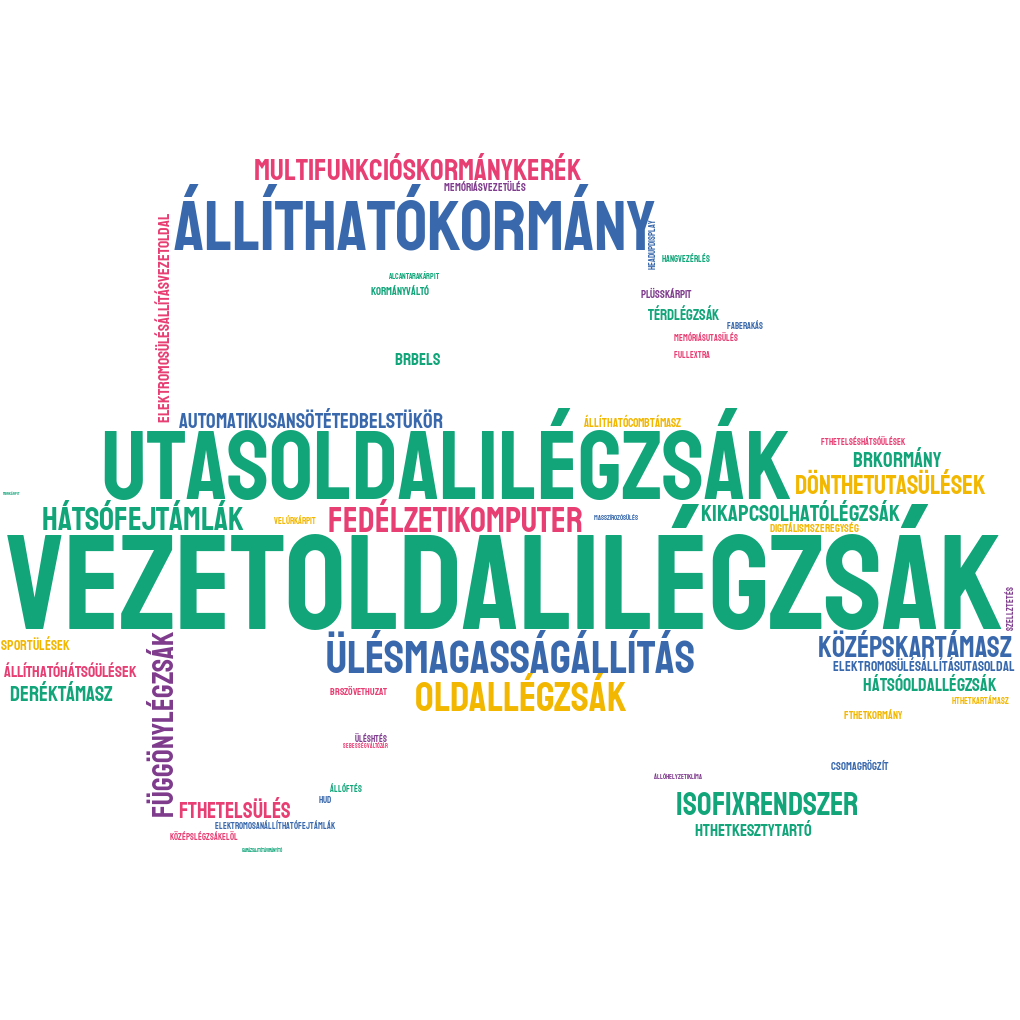


Felszereltségek Műszaki kategóriában


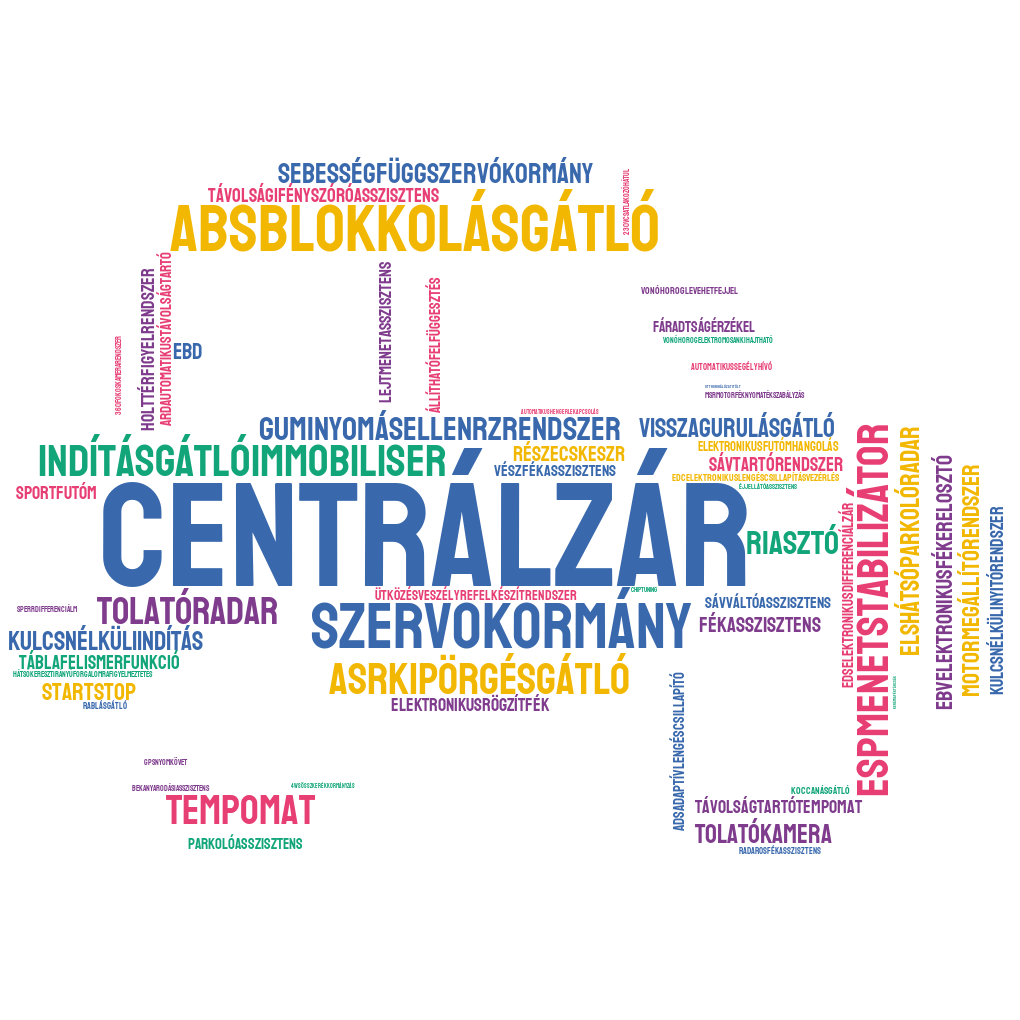


Felszereltségek Kültér kategóriában


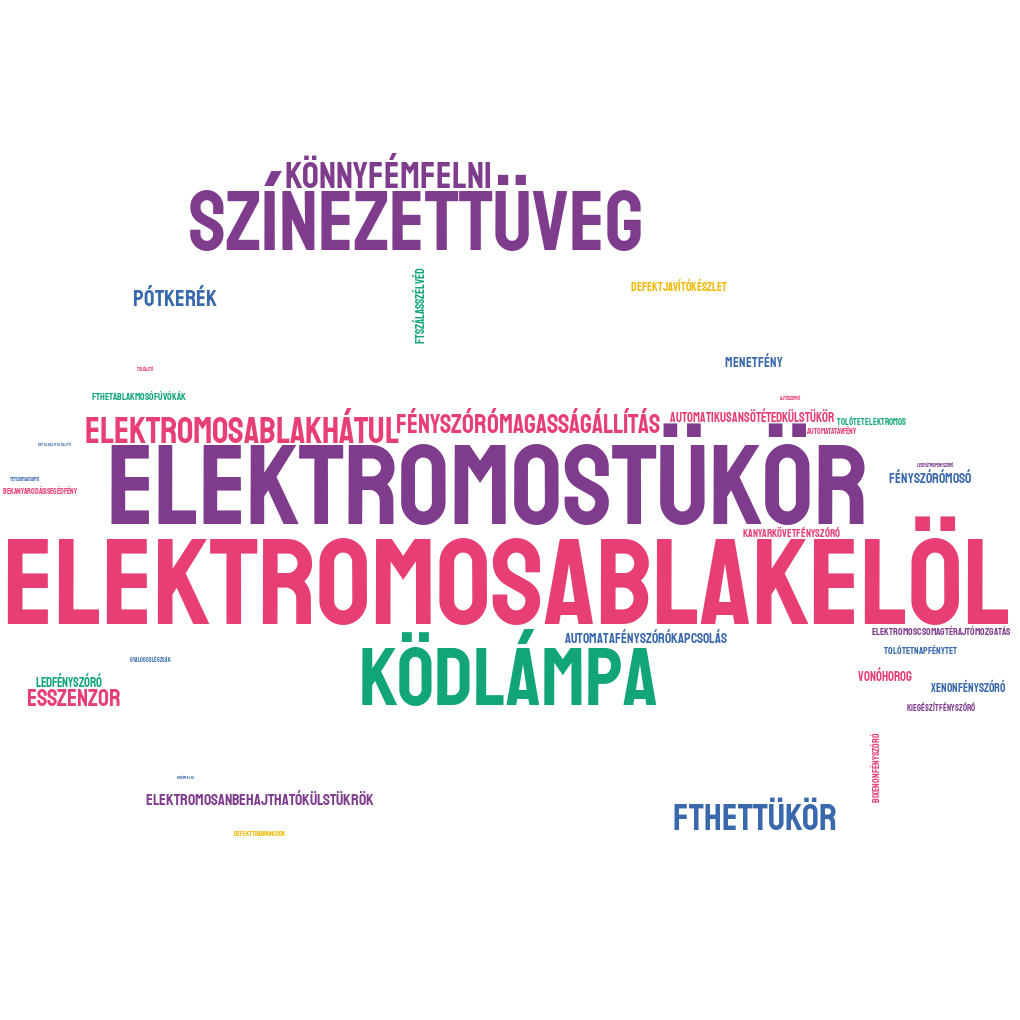


Felszereltségek Multimédia-navigáció kategóriában


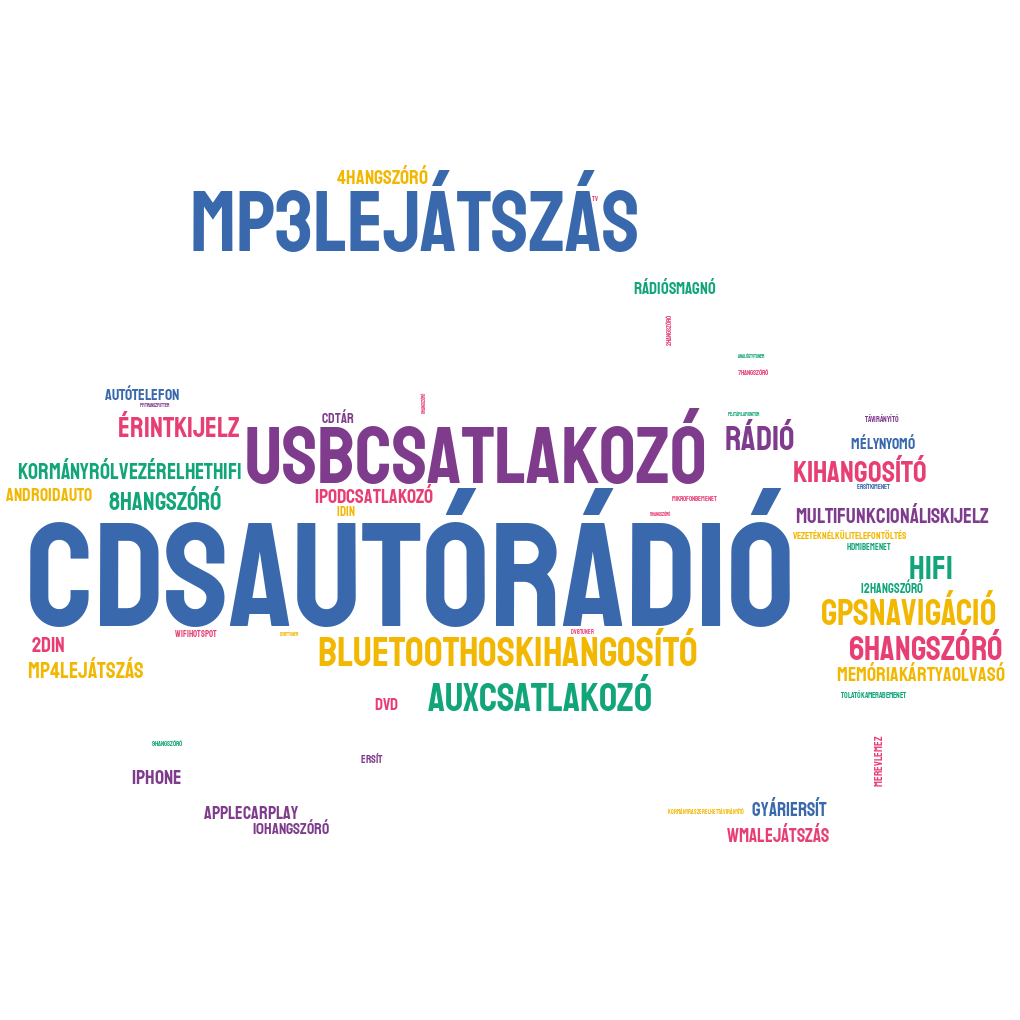

Wall time: 21.9 s


In [24]:
%%time

# https://fontawesome.com/v5.15/icons?d=gallery&p=2

for i in felszereltseg:

    list_of_features = [lista_element for sor in data[i] for lista_element in sor]
    list_of_features = [re.sub(r'[^ \nA-Za-z0-9À-ÖØ-öø-ÿ/]+', '', i) for i in list_of_features]
    list_of_features = [''.join(i.split()).strip() for i in list_of_features]
    text_of_features = ' '.join(list_of_features)
    
    if i == 'Multimédia / Navigáció':
        i = 'Multimédia-navigáció'
    
    print('\nFelszereltségek', i ,'kategóriában')    

    stylecloud.gen_stylecloud(text_of_features, max_words = 750, size = 1020, max_font_size = 150, icon_name = 'fas fa-car-side',
                              output_name = 'data/wordclouds/' + i + '.png', collocations = False, stopwords = False)

    display(Image(filename = 'data/wordclouds/' + i + '.png', width = 650))

### Get ready for modeling

In [25]:
data.drop(['Akciós ár', 'Gyorsulás 0-ról 100 km/h-ra', 'CO2-kibocsátás', 'Hengerűrtartalom', 'Szállítható szem. száma'], 1, inplace = True)

In [26]:
data = data[data['Üzemanyag'].notnull()]
data = data[data['Hajtás'].notnull()]
data = data[data['Okmányok jellege'].notnull()]

data['Sebességváltó fajtája'].fillna('Nincs megadva', inplace = True)
data['Szín'].fillna('Nincs megadva', inplace = True)
data['Klíma fajtája'].fillna('Nincs megadva', inplace = True)

In [27]:
data.loc[data['Modellcsoport modellezéshez'] == 'BMW I SOROZAT', 'Modellcsoport modellezéshez'] = 'BMW EGYÉB'
data.loc[data['Modellcsoport modellezéshez'] == 'FORD ECOSPORT', 'Modellcsoport modellezéshez'] = 'FORD EGYÉB'

In [28]:
null_count = data.isnull().sum() / data.shape[0]
null_count = null_count[(null_count > 0) & (null_count.index != 'Modellcsoport')] 
null_count

Saját tömeg          0.011941
Csomagtartó          0.044667
Szélesség            0.000455
Magasság             0.000404
Hosszúság            0.000438
Hasznos teher        0.001465
Vegyes fogyasztás    0.038182
Végsebesség          0.018055
Teljesítmény LE      0.000792
dtype: float64

In [29]:
for i in null_count.index:
    data[i].fillna(data.groupby('Modellcsoport modellezéshez')[i].transform('mean'), inplace = True)

In [30]:
data.loc[data['Modellcsoport modellezéshez'] == 'OPEL CROSSLAND', 'Vegyes fogyasztás'] = 5

In [31]:
data.to_csv('data/autok_final_modeling.csv.gz', index = False, compression = 'gzip')